# ADS Homework #5: Clustering Algorithms
Monday 2-5pm Session, Proffessor Tim Savage

Please submit this assignment to the NYU Classes 'Assignments' section by 12:00pm on Monday, December 17, strictly labeling the assignments with the format **'ADS_HW1_(your net ID).ipynb'**. Be sure not to confuse Net ID (e.g. 'acs882') with N-number ('N166...'). This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TA, Alex Shannon, at acs882@nyu.edu.

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import pandas as pd
import matplotlib.pyplot as plt

**Problem 1**) Explore the bias/variance trade-off that is associated with all prediction algorithms. To do so, use the randomly generated data below. Deploy the KNN algorithm with K = 3, K = 10, K = 25, and K = 49, and K = 100. Generate separate graphs for each.  

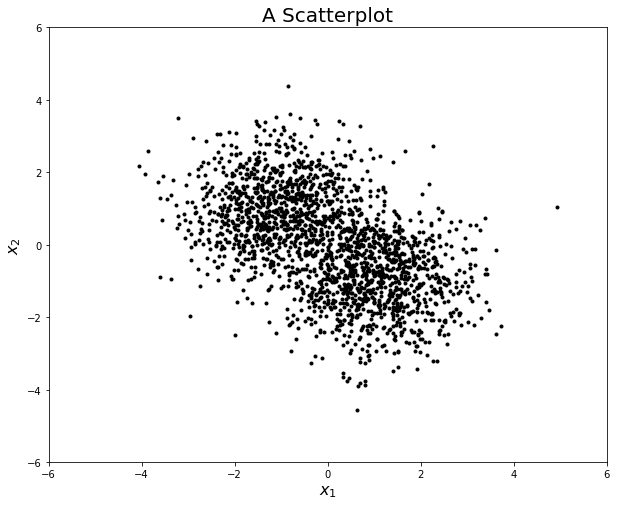

In [2]:
np.random.seed(12345)
red = np.random.multivariate_normal([-1, 1], [[1,0],[0,1]], 1000)
blue = np.random.multivariate_normal([1, -1], [[1,0],[0,1]], 1000)

plt.figure(figsize=(10,8))
plt.plot(red, blue, 'k.')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'A Scatterplot', fontsize = 20)
plt.show()

In [63]:
def plotknn(i, NN=3):
    
#     n = NN
    how = 'distance'
    knn = KNeighborsClassifier(NN, how)
    knn.fit(X, y)

    x1 = np.arange(-6, 6.1, 0.1)
    x2 = np.arange(-6, 6.1, 0.1)
    xx, yy = np.meshgrid(x1, x2)
    x = [i for i in zip(xx.flat,yy.flat)]
    z = knn.predict(x)
    z = z.reshape(121,121)
#     fig = plt.figure(figsize=(12,18))
#     print('predict result of %s neighbors'%NN)
    ax = fig.add_subplot(3,2,i)
#     plt.figure(figsize=(6, 6))
    ax.contourf(x1, x2, z, cmap='coolwarm_r')
    ax.plot(red[:,0], red[:,1], 'r.')
    ax.plot(blue[:,0], blue[:,1], 'b.')
    ax.set_title('predict result of %s neighbors'%NN)

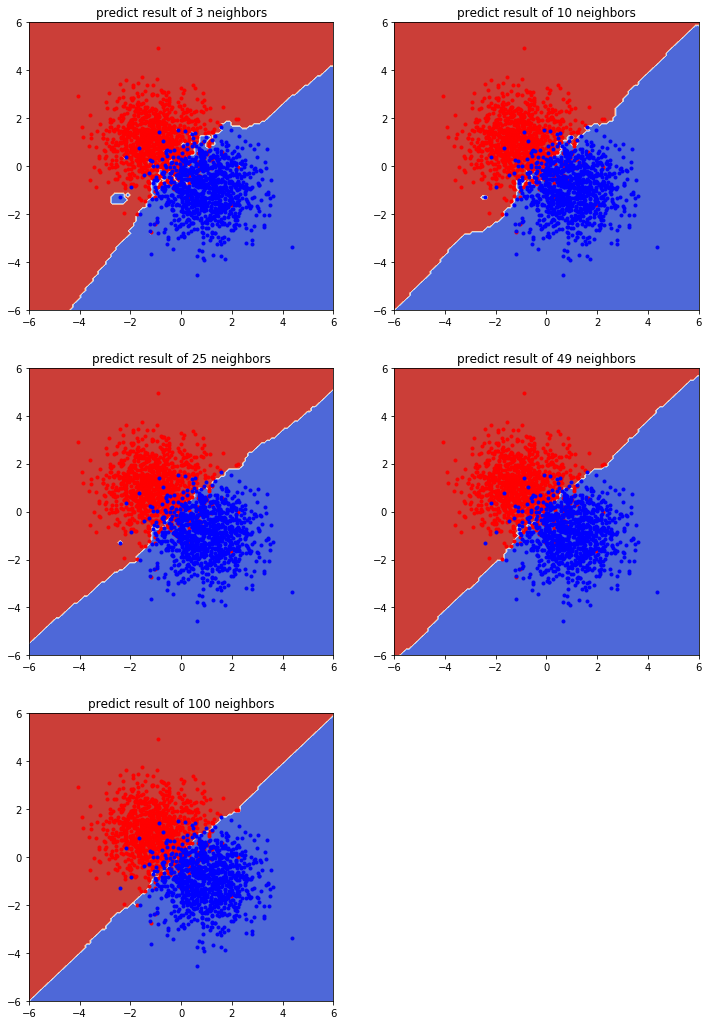

In [64]:
fig = plt.figure(figsize=(12,18))

plotknn(1, NN=3)
plotknn(2, NN=10)
plotknn(3, NN=25)
plotknn(4, NN=49)
plotknn(5, NN=100)

**Problem 2**) Read in the spam dataset, and split into training and test sets.  Increase the number of features used for analysis to the first 10 features, implement all the classifiers shown in class, namely KNN, RFF, LDA, MNL, NB, and Guessing.  Compare the accuracy and MSE of each method. (Note that MNL in this case is just the logit classifier.)

*LDA*: Linear Discriminant Analysis
*MNL*: MultiNomial Logit

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

In [66]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/"
              "spambase/spambase.data")
spam = pd.read_csv(target_url, header=None, prefix="v")

spam.rename(columns={'v57':'spam'}, inplace=True)
print (spam['spam'].head())
print (spam['spam'].tail())

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64
4596    0
4597    0
4598    0
4599    0
4600    0
Name: spam, dtype: int64


### 10 features

In [124]:
feature_num = [10, 20, 30, 40, 50, 56]
accuracy_knn = []
accuracy_rf = []
accuracy_lda = []
accuracy_mnl = []
accuracy_nb = []
accuracy_dum = []
mse_knn = []
mse_rf = []
mse_lda = []
mse_mnl = []
mse_nb = []
mse_dum = []
for i in feature_num:
    spam_np = np.array(spam)
    X = spam_np[:,:i]
    y = spam_np[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
    #knn
    knn = KNeighborsClassifier(3, 'distance')
    knn.fit(X_train, y_train)
    accuracy_knn.append(knn.score(X_test, y_test))
    mse_knn.append(mean_squared_error(y_test, knn.predict(X_test)))
    #random forest
    rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=10, max_features=4, n_jobs=4)
    rf.fit(X_train,y_train)
    rf.score(X_test, y_test)
    accuracy_rf.append(rf.score(X_test, y_test))
    mse_rf.append(mean_squared_error(y_test, rf.predict(X_test)))
    #Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    accuracy_lda.append(lda.score(X_test, y_test))
    mse_lda.append(mean_squared_error(y_test, lda.predict(X_test)))
    #multinomial logit
    mnl = LogisticRegression(solver='lbfgs')
    mnl.fit(X, y)
    accuracy_mnl.append(mnl.score(X_test, y_test))
    mse_mnl.append(mean_squared_error(y_test, mnl.predict(X_test)))
    #naive bayes
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    accuracy_nb.append(nb.score(X_test, y_test))
    mse_nb.append(mean_squared_error(y_test, nb.predict(X_test)))
    #dummy
    dum = DummyClassifier()
    dum.fit(X_train, y_train)
    accuracy_dum.append(dum.score(X_test, y_test))
    mse_dum.append(mean_squared_error(y_test, dum.predict(X_test)))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


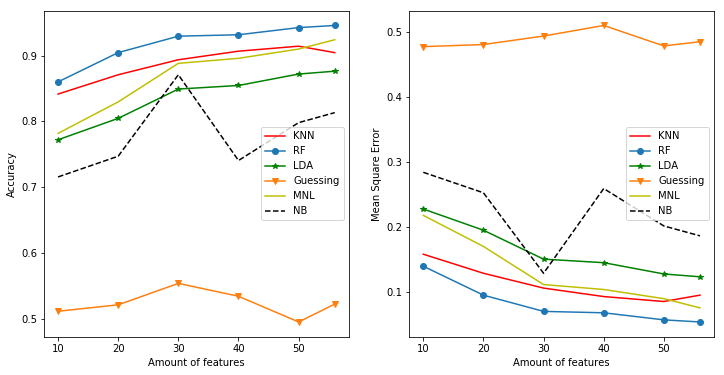

In [127]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(feature_num, accuracy_knn, 'r-', label='KNN')
ax1.plot(feature_num, accuracy_rf, 'o-', label='RF')
ax1.plot(feature_num, accuracy_lda, 'g*-', label='LDA')
ax1.plot(feature_num, accuracy_dum, 'v-', label='Guessing')
ax1.plot(feature_num, accuracy_mnl, 'y-', label='MNL')
ax1.plot(feature_num, accuracy_nb, 'k--', label='NB')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Amount of features')
ax1.legend()
ax2 = fig.add_subplot(1,2,2)
ax2.plot(feature_num, mse_knn, 'r-', label='KNN')
ax2.plot(feature_num, mse_rf, 'o-', label='RF')
ax2.plot(feature_num, mse_lda, 'g*-', label='LDA')
ax2.plot(feature_num, mse_dum, 'v-', label='Guessing')
ax2.plot(feature_num, mse_mnl, 'y-', label='MNL')
ax2.plot(feature_num, mse_nb, 'k--', label='NB')
ax2.set_ylabel('Mean Square Error')
ax2.set_xlabel('Amount of features')
ax2.legend()